Importing all the libraries and functions which will be used further:

In [140]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import  plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

Importing the training data:

In [141]:
train_data = pd.read_csv(r"C:\Users\Khushi Chaudhari\Desktop\homeloan\loan_sanction_train.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking for null values:

In [142]:
train_data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [143]:
train_data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Describing the data:

In [144]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Information of dataset about the type of values present in the columns:

In [145]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Seeing for unique values in the dataset per column:

In [146]:
#unique values
for columns in train_data.columns:
    print(columns, train_data[columns].nunique())


Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 203
Loan_Amount_Term 10
Credit_History 2
Property_Area 3
Loan_Status 2


In [147]:
#droping null values and nan values
train_data_new = train_data.dropna()

In [148]:
#printing the shape of the new formed dataset:
print(train_data_new.shape)

(480, 13)


In [149]:
#dropping the loan ID column:
train_data_2 = train_data_new.drop(columns=('Loan_ID'))

Converting categorical to numerical: (Label encoding)

In [150]:
#Encoding "Gender" Column
train_data_2.replace({'Gender':{'Male':0,'Female':1,'0   NaN\ndtype':2}}, inplace= True)

#Encoding "Married" Column
train_data_2.replace({'Married':{'No':0,'Yes':1,'0   NaN\ndtype':2}}, inplace= True)

#Encoding "Education" Column
train_data_2.replace({'Education':{'Graduate':0,'Not Graduate':1}}, inplace= True)

#Encoding "Self_Employed" Column
train_data_2.replace({'Self_Employed':{'No':0,'Yes':1,'0   NaN\ndtype':2}}, inplace= True)

#Encoding "Property_Area" Column
train_data_2.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}}, inplace= True)

#Encoding "Dependents" Column
train_data_2.replace({'Dependents':{'0':0,'1':1,'2':2,'3+':3,'0   NaN\ndtype':4}}, inplace= True)

#Encoding "Loan_Status" Column
train_data_2.replace({'Loan_Status':{'Y':1, 'N':0}}, inplace= True)

#columntransformer sklearn

In [151]:
from scipy.stats import skew

skewness = train_data_2.skew()

# Print skewness for each column
print("Skewness for each column:")
print(skewness)

# You can also calculate skewness for a specific column
# Replace 'column_name' with the actual column name you want to check
specific_column_skewness = skew(train_data_2['Dependents'])
print(f"Skewness for 'column_name': {specific_column_skewness}")

Skewness for each column:
Gender               1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area        0.203263
Loan_Status         -0.832681
dtype: float64
Skewness for 'column_name': 0.9393244571366454


Plotting the distribution of the target labels:

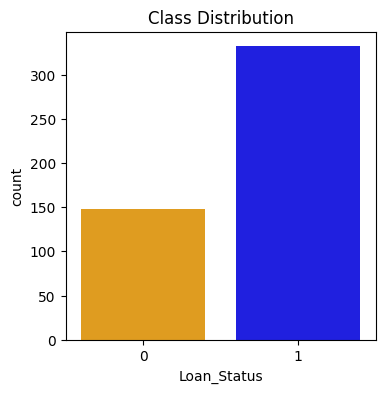

In [152]:

class_colors = {'1': 'blue', '0': 'orange'}
plt.figure(figsize=(4, 4))
sns.countplot(x="Loan_Status", data=train_data_2, palette=class_colors)
plt.title("Class Distribution")
plt.show()

Correlational Matrix:

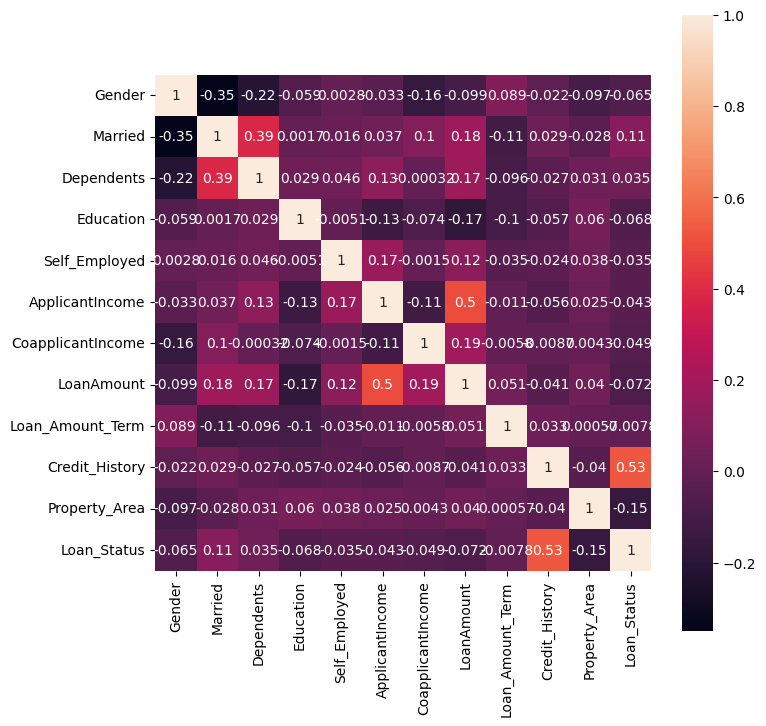

In [153]:
corr_matrix =train_data_2.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, square=True)
#sns.heatmap(corr_matrix, annot=True,square=True, cmap='coolwarm')
plt.show()

Splitting of data:


In [154]:
x = train_data_2.drop(columns=['Loan_Status'])
y = train_data_2.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [155]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x, y)

In [156]:
print(pd.Series(y_train_smote).value_counts())

Loan_Status
0    332
1    332
Name: count, dtype: int64


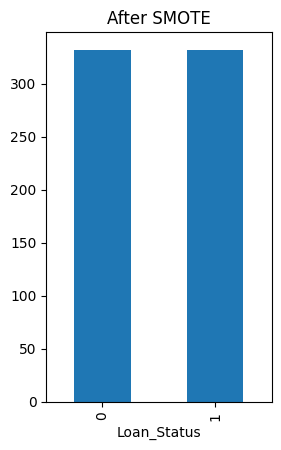

In [157]:

plt.subplot(1, 2, 2)
plt.title("After SMOTE")
pd.Series(y_train_smote).value_counts().plot(kind='bar')

plt.show()

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

In [159]:
print(X_test.shape)

(133, 11)


In [160]:


'''smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)'''

'smote = SMOTE(random_state=42)\nX_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)'

In [161]:
'''print(pd.Series(y_train_smote).value_counts())'''

'print(pd.Series(y_train_smote).value_counts())'

In [162]:
'''smote = SMOTE(random_state=42)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)'''

'smote = SMOTE(random_state=42)\nX_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)'

In [163]:
'''plt.subplot(1, 2, 2)
plt.title("After SMOTE: test data")
pd.Series(y_test_smote).value_counts().plot(kind='bar')

plt.show()'''

'plt.subplot(1, 2, 2)\nplt.title("After SMOTE: test data")\npd.Series(y_test_smote).value_counts().plot(kind=\'bar\')\n\nplt.show()'

In [164]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Computing mutual information for feature selection:

In [165]:


'''# Set a random seed for reproducibility
#np.random.seed(12)
# Compute Mutual Information
importances = mutual_info_classif(X_train, y_train, random_state = 12)# can random_state inside
#with the change in random state the graph is changing 
# Create a Series for Visualization
feat_importances = pd.Series(importances, index=X_train.columns)

# Define colors for each feature
feature_colors = ['green', 'orange', 'blue', 'red', 'purple']  

# Plot Feature Importances with custom colors
feat_importances.plot(kind='barh', color=feature_colors)
plt.title('Mutual Information for Feature Selection')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.show()'''

"# Set a random seed for reproducibility\n#np.random.seed(12)\n# Compute Mutual Information\nimportances = mutual_info_classif(X_train, y_train, random_state = 12)# can random_state inside\n#with the change in random state the graph is changing \n# Create a Series for Visualization\nfeat_importances = pd.Series(importances, index=X_train.columns)\n\n# Define colors for each feature\nfeature_colors = ['green', 'orange', 'blue', 'red', 'purple']  \n\n# Plot Feature Importances with custom colors\nfeat_importances.plot(kind='barh', color=feature_colors)\nplt.title('Mutual Information for Feature Selection')\nplt.xlabel('Mutual Information Score')\nplt.ylabel('Feature')\nplt.show()"

Selecting features:

In [166]:
'''selected_features = ['Credit_History', 'Loan_Amount_Term', 'ApplicantIncome', 'Married']  

# Select only the specified features from the training and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]'''

"selected_features = ['Credit_History', 'Loan_Amount_Term', 'ApplicantIncome', 'Married']  \n\n# Select only the specified features from the training and test sets\nX_train_selected = X_train[selected_features]\nX_test_selected = X_test[selected_features]"

In [167]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train :", y_train.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test:", y_test.shape)

X_train_scaled shape: (531, 11)
y_train : (531,)
X_test_scaled shape: (133, 11)
y_test: (133,)


1) Logistic Regression:

In [168]:
LR_classifier = LogisticRegression()

# Define the hyperparameters for grid search
param_grid = {
    'C': [ 1, 10 , 100, 1000],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

# Perform GridSearchCV
grid_search = GridSearchCV(LR_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best parameters found by GridSearchCV
print("Best Parameters for Logistic Regression:")
print(grid_search.best_params_)

# Get the best model from GridSearchCV
best_LR_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_LR_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for logistic regression:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')


Best Parameters for Logistic Regression:
{'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Confusion Matrix:
[[44 21]
 [11 57]]
Predictive Accuracy achieved for logistic regression: 75.93984962406014


Logistic Regression after feature selection:

In [169]:
'''# Create and train the Logistic Regression model using the selected features
LR_classifier_F = LogisticRegression()#(random_state=0, multi_class='binary', solver='lbfgs')
LR_classifier_F.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = LR_classifier_F.predict(X_test_selected)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")'''


'# Create and train the Logistic Regression model using the selected features\nLR_classifier_F = LogisticRegression()#(random_state=0, multi_class=\'binary\', solver=\'lbfgs\')\nLR_classifier_F.fit(X_train_selected, y_train)\n\n# Make predictions on the test set using the selected features\ny_pred = LR_classifier_F.predict(X_test_selected)\n\n\n# Confusion Matrix\ncm = confusion_matrix(y_test, y_pred)\nprint("Confusion Matrix:")\nprint(cm)\n\n# Accuracy Score\naccuracy = accuracy_score(y_test, y_pred)\nprint(\'Predictive Accuracy achieved for RFC:\', accuracy * 100)\n\n# Calculate precision, recall, and F1 score\nprecision = precision_score(y_test, y_pred, average=\'macro\')\nrecall = recall_score(y_test, y_pred, average=\'macro\')\nf1 = f1_score(y_test, y_pred, average=\'macro\')\n\nprint(f"Macro Precision: {precision:.2f}")\nprint(f"Macro Recall: {recall:.2f}")\nprint(f"Macro F1 Score: {f1:.2f}")'

K Nearest Neighbour:

In [170]:
# Assuming X_train, X_test, y_train, and y_test are already defined

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Instantiate the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best parameters found by GridSearchCV
print("Best Parameters for K-Nearest Neighbors:")
print(grid_search.best_params_)

# Get the best model from GridSearchCV
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for KNN:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1 Score: {f1:.2f}")


Best Parameters for K-Nearest Neighbors:
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Confusion Matrix:
[[51 14]
 [17 51]]
Predictive Accuracy achieved for KNN: 76.69172932330827
Weighted Precision: 0.77
Weighted Recall: 0.77
Weighted F1 Score: 0.77


K Nearest Neighbour after feature selection:

In [171]:
'''KNN_classifier_F = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_classifier_F.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = KNN_classifier_F.predict(X_test_selected)

m = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

## Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")'''

'KNN_classifier_F = KNeighborsClassifier(n_neighbors=5, metric=\'minkowski\', p=2)\nKNN_classifier_F.fit(X_train_selected, y_train)\n\n# Make predictions on the test set using the selected features\ny_pred = KNN_classifier_F.predict(X_test_selected)\n\nm = confusion_matrix(y_test, y_pred)\nprint("Confusion Matrix:")\nprint(cm)\n\n## Accuracy Score\naccuracy = accuracy_score(y_test, y_pred)\nprint(\'Predictive Accuracy achieved for RFC:\', accuracy * 100)\n\n# Calculate precision, recall, and F1 score\nprecision = precision_score(y_test, y_pred, average=\'macro\')\nrecall = recall_score(y_test, y_pred, average=\'macro\')\nf1 = f1_score(y_test, y_pred, average=\'macro\')\n\nprint(f"Macro Precision: {precision:.2f}")\nprint(f"Macro Recall: {recall:.2f}")\nprint(f"Macro F1 Score: {f1:.2f}")'

Naive Bayes :

In [172]:
param_grid = {
    'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]  # Prior probabilities for classes
}

# Create and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform GridSearchCV
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best parameters found by GridSearchCV
print("Best Parameters for Naive Bayes:")
print(grid_search.best_params_)

# Get the best model from GridSearchCV
best_nb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_nb_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for Naive Bayes:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1 Score: {f1:.2f}")

Best Parameters for Naive Bayes:
{'priors': None}
Confusion Matrix:
[[37 28]
 [ 4 64]]
Predictive Accuracy achieved for Naive Bayes: 75.93984962406014
Weighted Precision: 0.80
Weighted Recall: 0.76
Weighted F1 Score: 0.75


Naive Bayes after feature selection:

In [173]:
'''NB_classifier_F = GaussianNB()
NB_classifier_F.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = NB_classifier_F.predict(X_test_selected)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")'''


'NB_classifier_F = GaussianNB()\nNB_classifier_F.fit(X_train_selected, y_train)\n\n# Make predictions on the test set using the selected features\ny_pred = NB_classifier_F.predict(X_test_selected)\n\n# Confusion Matrix\ncm = confusion_matrix(y_test, y_pred)\nprint("Confusion Matrix:")\nprint(cm)\n\n# Accuracy Score\naccuracy = accuracy_score(y_test, y_pred)\nprint(\'Predictive Accuracy achieved for RFC:\', accuracy * 100)\n\n# Calculate precision, recall, and F1 score\nprecision = precision_score(y_test, y_pred, average=\'macro\')\nrecall = recall_score(y_test, y_pred, average=\'macro\')\nf1 = f1_score(y_test, y_pred, average=\'macro\')\n\nprint(f"Macro Precision: {precision:.2f}")\nprint(f"Macro Recall: {recall:.2f}")\nprint(f"Macro F1 Score: {f1:.2f}")'

Decision Tree:

In [174]:

# Assuming X_train, X_test, y_train, and y_test are already defined
param_grid = {
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
} #### Decision Tree

# Create and train the Decision Tree classifier
DT_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(DT_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
 
# Print best parameters found by GridSearchCV
print("Best Parameters for decision tree:")
print(grid_search.best_params_)

# Get the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for DT:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1 Score: {f1:.2f}")

Best Parameters for decision tree:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix:
[[57  8]
 [18 50]]
Predictive Accuracy achieved for DT: 80.45112781954887
Weighted Precision: 0.81
Weighted Recall: 0.81
Weighted F1 Score: 0.80


Decision Tree after feature selection:

In [175]:


'''DT_classifier_F = DecisionTreeClassifier(criterion='gini', random_state=12)
DT_classifier_F.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = DT_classifier_F.predict(X_test_selected)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")'''



'DT_classifier_F = DecisionTreeClassifier(criterion=\'gini\', random_state=12)\nDT_classifier_F.fit(X_train_selected, y_train)\n\n# Make predictions on the test set using the selected features\ny_pred = DT_classifier_F.predict(X_test_selected)\n\n# Confusion Matrix\ncm = confusion_matrix(y_test, y_pred)\nprint("Confusion Matrix:")\nprint(cm)\n\n# Accuracy Score\naccuracy = accuracy_score(y_test, y_pred)\nprint(\'Predictive Accuracy achieved for RFC:\', accuracy * 100)\n\n# Calculate precision, recall, and F1 score\nprecision = precision_score(y_test, y_pred, average=\'macro\')\nrecall = recall_score(y_test, y_pred, average=\'macro\')\nf1 = f1_score(y_test, y_pred, average=\'macro\')\n\nprint(f"Macro Precision: {precision:.2f}")\nprint(f"Macro Recall: {recall:.2f}")\nprint(f"Macro F1 Score: {f1:.2f}")'

Random Forest:

In [176]:
# Assuming X_train, X_test, y_train, and y_test are already defined
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4] 
}
# Create and train the RandomForestClassifier

RFC_classifier = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(RFC_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
 
# Print best parameters found by GridSearchCV
print("Best Parameters for random forest:")
print(grid_search.best_params_)

# Get the best model from GridSearchCV
best_rfc_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rfc_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1 Score: {f1:.2f}")

Best Parameters for random forest:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Confusion Matrix:
[[40 25]
 [ 5 63]]
Predictive Accuracy achieved for RFC: 77.44360902255639
Weighted Precision: 0.80
Weighted Recall: 0.77
Weighted F1 Score: 0.77


Random Forest after feature selection:

In [177]:
'''RFC_classifier_F = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=42)
RFC_classifier_F.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = RFC_classifier_F.predict(X_test_selected)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")'''

'RFC_classifier_F = RandomForestClassifier(n_estimators=1000, criterion=\'entropy\', random_state=42)\nRFC_classifier_F.fit(X_train_selected, y_train)\n\n# Make predictions on the test set using the selected features\ny_pred = RFC_classifier_F.predict(X_test_selected)\n\n# Confusion Matrix\ncm = confusion_matrix(y_test, y_pred)\nprint("Confusion Matrix:")\nprint(cm)\n\n# Accuracy Score\naccuracy = accuracy_score(y_test, y_pred)\nprint(\'Predictive Accuracy achieved for RFC:\', accuracy * 100)\n\n# Calculate precision, recall, and F1 score\nprecision = precision_score(y_test, y_pred, average=\'macro\')\nrecall = recall_score(y_test, y_pred, average=\'macro\')\nf1 = f1_score(y_test, y_pred, average=\'macro\')\n\nprint(f"Macro Precision: {precision:.2f}")\nprint(f"Macro Recall: {recall:.2f}")\nprint(f"Macro F1 Score: {f1:.2f}")'

SVM:

In [178]:

# Assuming X_train, X_test, y_train, and y_test are already defined
param_grid = {
    'C': [1, 10, 100, 1000],   # Regularization parameter
    'kernel': ['linear',  'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
} ####SVM
# Create and train the SVM classifier
SVM_classifier = SVC()


grid_search = GridSearchCV(SVM_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
 
# Print best parameters found by GridSearchCV
print("Best Parameters for svm:")
print(grid_search.best_params_)

# Get the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for svm:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1 Score: {f1:.2f}")

Best Parameters for svm:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Confusion Matrix:
[[49 16]
 [13 55]]
Predictive Accuracy achieved for svm: 78.19548872180451
Weighted Precision: 0.78
Weighted Recall: 0.78
Weighted F1 Score: 0.78


SVM after featue selection:

In [179]:
'''SVM_classifier_F = SVC(kernel='linear', random_state=42)
SVM_classifier_F.fit(X_train_selected , y_train)

# Make predictions on the test set
y_pred = SVM_classifier_F.predict(X_test_selected)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for SVM:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")'''

'SVM_classifier_F = SVC(kernel=\'linear\', random_state=42)\nSVM_classifier_F.fit(X_train_selected , y_train)\n\n# Make predictions on the test set\ny_pred = SVM_classifier_F.predict(X_test_selected)\n\n# Confusion Matrix\ncm = confusion_matrix(y_test, y_pred)\nprint("Confusion Matrix:")\nprint(cm)\n\n# Accuracy Score\naccuracy = accuracy_score(y_test, y_pred)\nprint(\'Predictive Accuracy achieved for SVM:\', accuracy * 100)\n\n# Calculate precision, recall, and F1 score\nprecision = precision_score(y_test, y_pred, average=\'macro\')\nrecall = recall_score(y_test, y_pred, average=\'macro\')\nf1 = f1_score(y_test, y_pred, average=\'macro\')\n\nprint(f"Macro Precision: {precision:.2f}")\nprint(f"Macro Recall: {recall:.2f}")\nprint(f"Macro F1 Score: {f1:.2f}")'

Gradiant Boosting:

In [180]:

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 7]  # Maximum depth of the individual trees
}  #### Gradient Boosting

GB_classifier = GradientBoostingClassifier()


grid_search = GridSearchCV(GB_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
 
# Print best parameters found by GridSearchCV
print("Best Parameters for gradient boosting:")
print(grid_search.best_params_)

# Get the best model from GridSearchCV
best_gb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_gb_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for gradient boosting:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1 Score: {f1:.2f}")

Best Parameters for gradient boosting:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Confusion Matrix:
[[57  8]
 [ 9 59]]
Predictive Accuracy achieved for gradient boosting: 87.21804511278195
Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1 Score: 0.87


Gradiant Boosting after feature selection:

In [181]:
'''GB_classifier1 = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)
GB_classifier1.fit(X_train_selected , y_train)

# Make predictions on the test set
y_pred_gb = GB_classifier1.predict(X_test_selected)

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(cm_gb)

# Accuracy Score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print('Predictive Accuracy achieved for Gradient Boosting:', accuracy_gb * 100)

# Calculate precision, recall, and F1 score
precision_gb = precision_score(y_test, y_pred_gb, average='macro')
recall_gb = recall_score(y_test, y_pred_gb, average='macro')
f1_gb = f1_score(y_test, y_pred_gb, average='macro')

print(f"Macro Precision: {precision_gb:.2f}")
print(f"Macro Recall: {recall_gb:.2f}")
print(f"Macro F1 Score: {f1_gb:.2f}")'''

'GB_classifier1 = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)\nGB_classifier1.fit(X_train_selected , y_train)\n\n# Make predictions on the test set\ny_pred_gb = GB_classifier1.predict(X_test_selected)\n\n# Confusion Matrix\ncm_gb = confusion_matrix(y_test, y_pred_gb)\nprint("Confusion Matrix:")\nprint(cm_gb)\n\n# Accuracy Score\naccuracy_gb = accuracy_score(y_test, y_pred_gb)\nprint(\'Predictive Accuracy achieved for Gradient Boosting:\', accuracy_gb * 100)\n\n# Calculate precision, recall, and F1 score\nprecision_gb = precision_score(y_test, y_pred_gb, average=\'macro\')\nrecall_gb = recall_score(y_test, y_pred_gb, average=\'macro\')\nf1_gb = f1_score(y_test, y_pred_gb, average=\'macro\')\n\nprint(f"Macro Precision: {precision_gb:.2f}")\nprint(f"Macro Recall: {recall_gb:.2f}")\nprint(f"Macro F1 Score: {f1_gb:.2f}")'

In [182]:
test_data = pd.read_csv(r"C:\Users\Khushi Chaudhari\Desktop\homeloan\loan_sanction_test.csv")
print(test_data.shape)

(367, 12)


In [183]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [184]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [185]:
test_data.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [186]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [187]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [188]:
test_data_2= test_data.drop(columns=('Loan_ID'))

In [189]:
#Encoding "Gender" Column
test_data_2.replace({'Gender':{'Male':0,'Female':1,'0   NaN\ndtype':2}}, inplace= True)

#Encoding "Married" Column
test_data_2.replace({'Married':{'No':0,'Yes':1,'0   NaN\ndtype':2}}, inplace= True)

#Encoding "Education" Column
test_data_2.replace({'Education':{'Graduate':0,'Not Graduate':1}}, inplace= True)

#Encoding "Self_Employed" Column
test_data_2.replace({'Self_Employed':{'No':0,'Yes':1,'0   NaN\ndtype':2}}, inplace= True)

#Encoding "Property_Area" Column
test_data_2.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}}, inplace= True)

#Encoding "Dependents" Column
test_data_2.replace({'Dependents':{'0':0,'1':1,'2':2,'3+':3,'0   NaN\ndtype':4}}, inplace= True)

#Encoding "Loan_Status" Column
test_data_2.replace({'Loan_Status':{'Y':1, 'N':0}}, inplace= True)


In [190]:
#droping null values and nan values
test_data_new = test_data_2.dropna()

In [191]:
X_test = test_data_new

In [193]:


# Make predictions on the testing set
y_pred = best_rfc_model.predict(X_test)

# Save the predicted labels to a text file
np.savetxt("predicted_labels_home_loan_rfc_final.txt", y_pred, fmt="%d")


